In [ ]:
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Read Image

In [ ]:
img = cv2.imread('/content/drive/MyDrive/OpenCV with python/Images/unnamed.jpg')

Read dimensions

In [ ]:
img.shape

(900, 900, 3)

In [ ]:
img.size

2430000

In [ ]:
img.dtype

dtype('uint8')

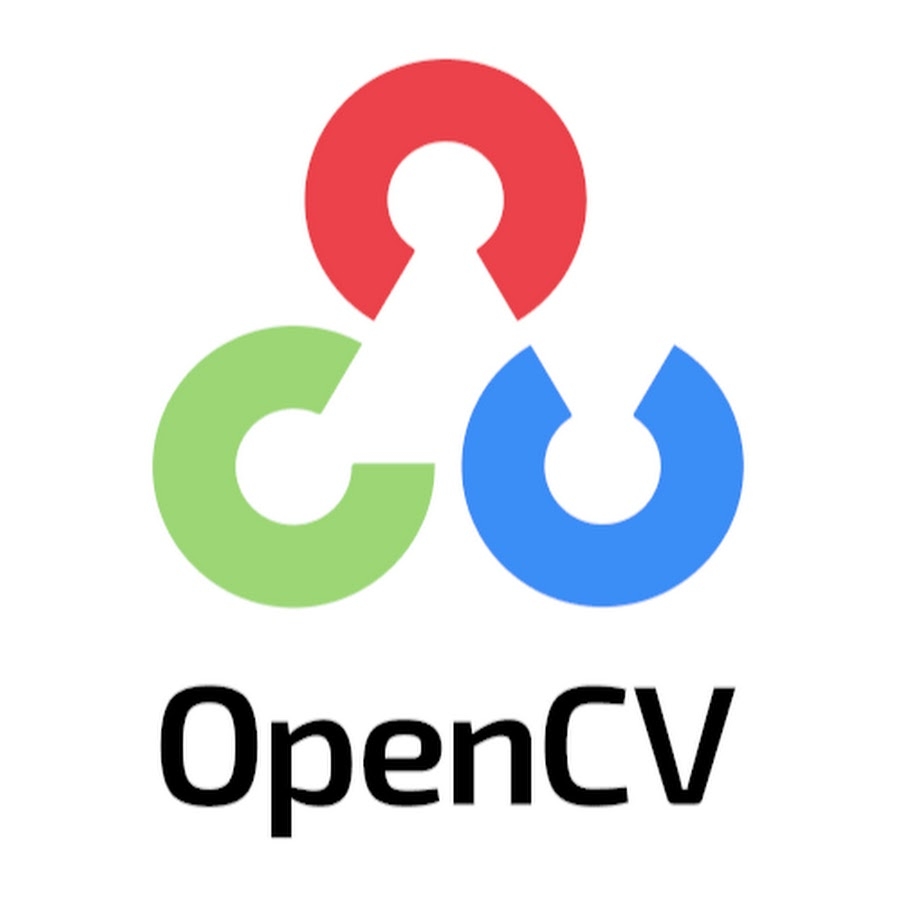

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(img)

In [ ]:
(b,g,r)=img[6,40]

In [ ]:
print('\n',b,'\n',g,'\n',r)


 255 
 255 
 255


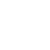

In [ ]:
cv2_imshow(img[0:50, 0:50]) # bottom right

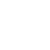

In [ ]:
cv2_imshow(img[850:900,850:900]) # bottom right

In [ ]:
imgray = cv2.imread('/content/drive/MyDrive/OpenCV with python/Images/unnamed.jpg',cv2.IMREAD_GRAYSCALE)

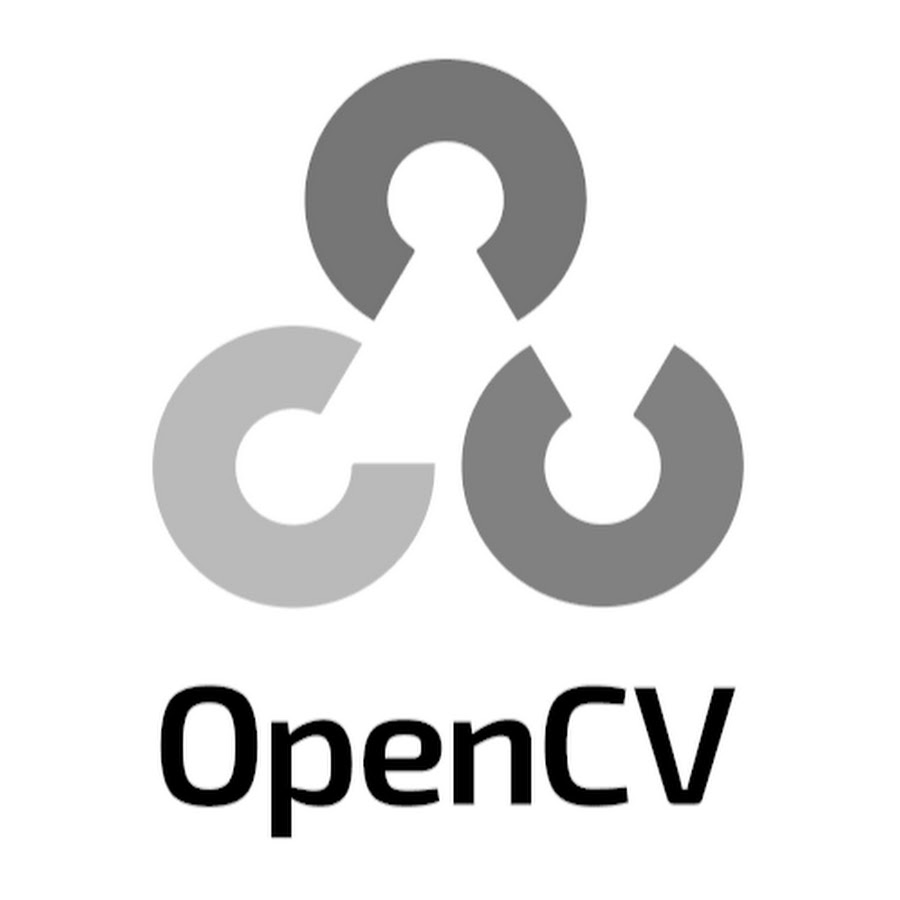

In [ ]:
cv2_imshow(imgray)

In [ ]:
imgray.size<img.size

True

In [ ]:
b,g,r=cv2.split(img)

In [ ]:
img_matplotlib=cv2.merge([r,g,b])

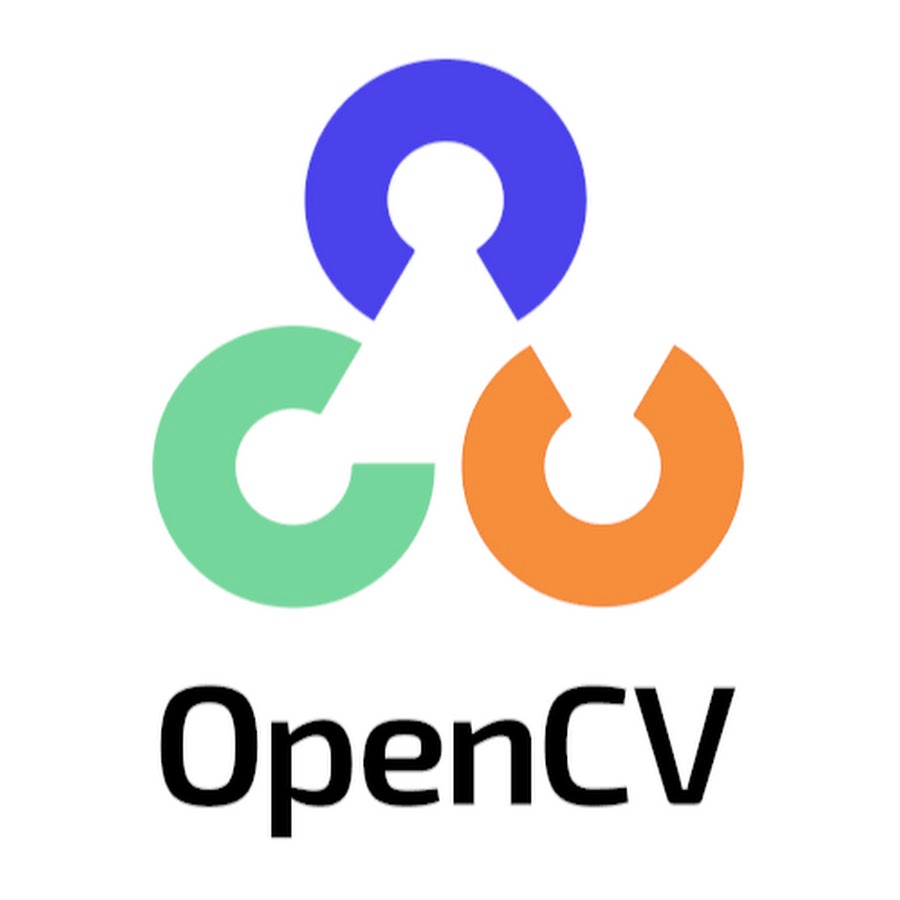

In [ ]:
cv2_imshow(img_matplotlib)

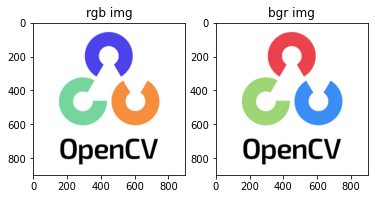

In [ ]:
import matplotlib.pyplot as plt
plt.subplot(121,title='rgb img')
plt.imshow(img)
plt.subplot(122,title='bgr img')
plt.imshow(img_matplotlib)
plt.show()

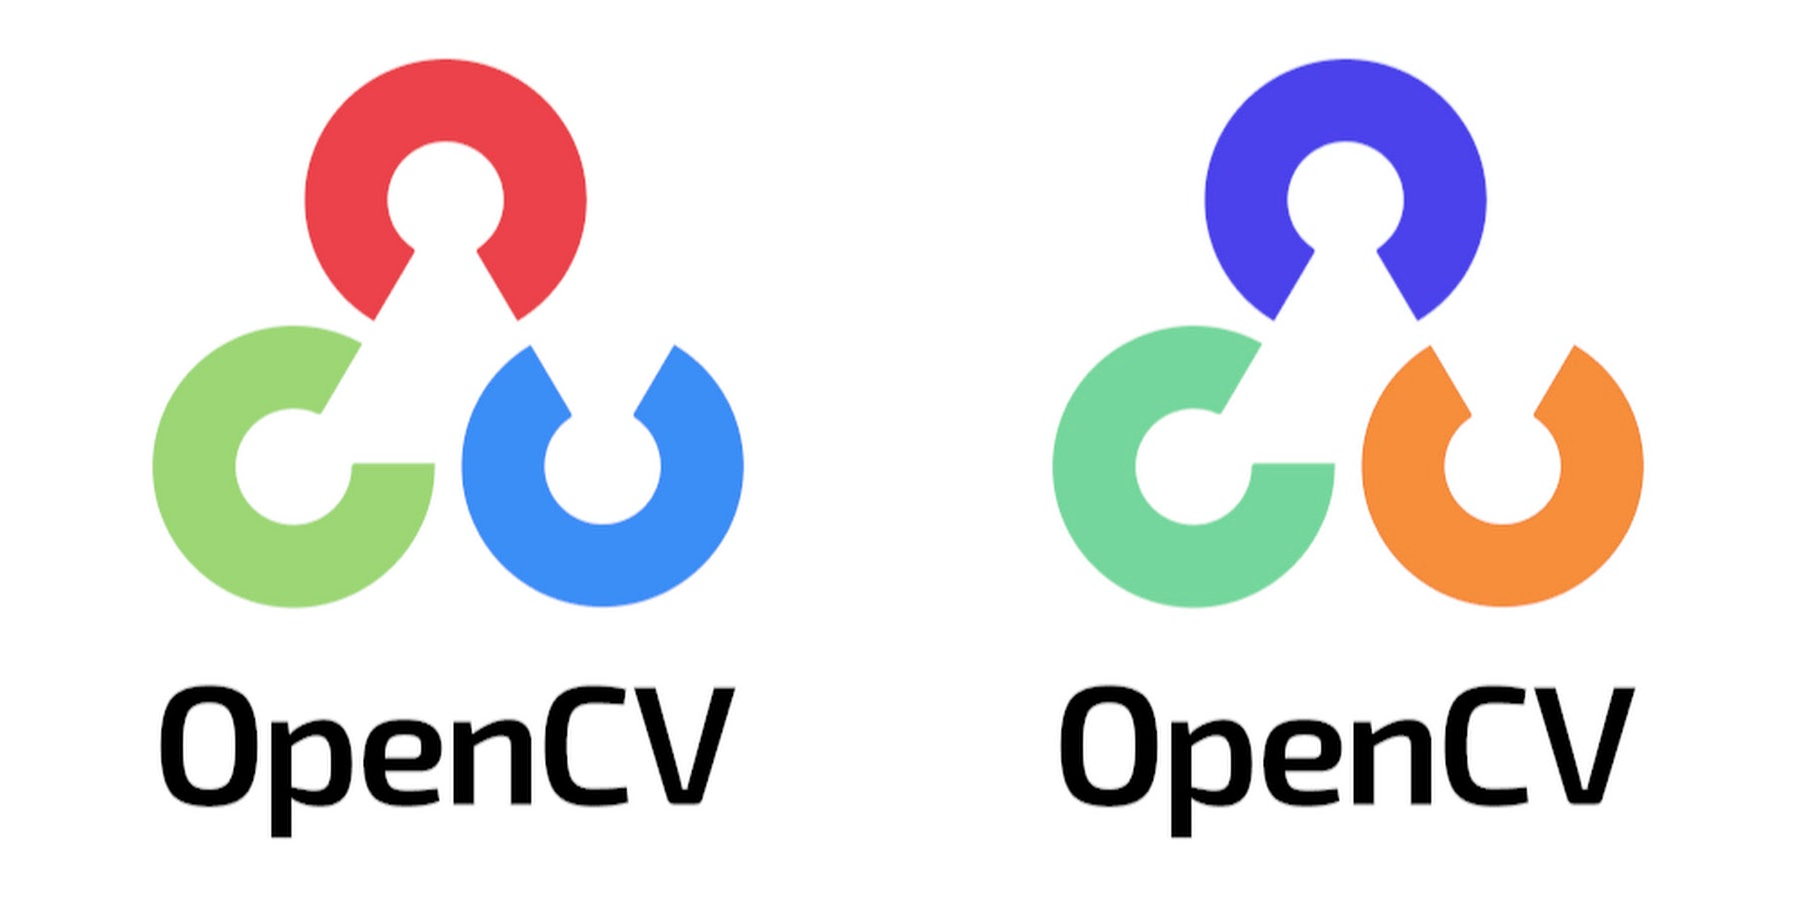

In [ ]:
import numpy as np
img_concat=np.concatenate((img,img_matplotlib),axis=1)
cv2_imshow(img_concat)

In [ ]:
b = img[:,:,0]
g = img[:,:,1]
r = img[:,:,2]

### ```sys.argv```

In [ ]:
import sys
print("The name of the script being processed is:{}".format(sys.argv[0]))
print("The number of arguments of the script is:{}".format(len(sys.argv)))
print("The arguments of the script are:{}".format(str(sys.argv)))

### ```json file handling```

In [ ]:
import json
f=open('/root/.local/share/jupyter/runtime/kernel-918af1c9-e47f-4e70-8717-d711909df251.json',"r")
data = json.loads(f.read())
data

{'shell_port': 54163,
 'iopub_port': 51685,
 'stdin_port': 38373,
 'control_port': 52623,
 'hb_port': 58941,
 'ip': '127.0.0.1',
 'key': '',
 'transport': 'tcp',
 'signature_scheme': 'hmac-sha256',
 'kernel_name': ''}

### ```Argparse```

We should take into account that we shouldn't handle sys.argv directly, especially when we have to deal with complex parameters or multiple filenames, alternatively we can use `argparse` library.

We can see above there's an error.
Therefore we should call this script with the -h argument. In this way, the usage message information will be shown.

      |--- package argparse
          |--- class AgrumentParser
              |--- def parse_args()
              |--- def add_argument()

```python:
import argparse

parser = argparse.ArgumentParser()

parser.add_argument("first_number", type=int)
parser.add_argument("second_number", type=int)

args= parser.parse_args()
print("args: {}".format(args))
print("args: {}".format(args))
print("Sum: {}".fromat(args.first_number+args.second_number))
```

In [ ]:
!python "/content/drive/MyDrive/OpenCV with python/argparser.py" 1 2

args: Namespace(first_number=1, second_number=2)
args: Namespace(first_number=1, second_number=2)
Sum: 3


### **Reading images**
___
in ```image_read_args.py``` file:
```python:
import argparse
import cv2 
parser = argparse.ArgumentParser()
parser.add_argument("path_image", help="path to input image to be displayed")
args = parser.parse_args()
image = cv2.imread(args.path_image) 
# or we could use
args = vars(parser.parse_args()) 
cv2.imread(args['path_image'])
cv2.imshow("Loaded image", image)
```

In [ ]:
!python "/content/drive/MyDrive/OpenCV with python/image_read_args.py" '/content/drive/MyDrive/OpenCV with python/Images/unnamed.jpg'

{'path_image': '/content/drive/MyDrive/OpenCV with python/Images/unnamed.jpg'}


### **Writing Image**
___
in ```image_write_args.py``` file:
```python:
import argparse
import cv2 
parser = argparse.ArgumentParser()
parser.add_argument("path_image_input", help="path to input image to be displayed")
parser.add_argument("path_image_output", help="path to output image to be saved")
args = vars(parser.parse_args())
image_input = cv2.imread(args['path_image_input'])
gray_image = cv2.cvtColor(image_input,cv2.COLOR_BGR2GRAY)
cv2.imwrite(args['path_image_output'],gray_image)
```

In [ ]:
!python "/content/drive/MyDrive/OpenCV with python/image_write_args.py" '/content/drive/MyDrive/OpenCV with python/Images/unnamed.jpg' '/content/drive/MyDrive/OpenCV with python/Images/grey.jpg'

### **Reading Camera frames and video files**
___

The required argument is ``index_camera`` , if you have a webcam connected to your computer you can pass 0 as argument.

```python:
import cv2
import argparse

parser = argparse.ArgumentParser()
parser.add_argument("index_camera", help="index of the camera to read from")
args = parser.parse_args()

capture = cv2.VideoCapture(args.index_camera)
frame_width = capture.get(cv2.CAP_PROP_FRAME_WIDTH)
frame_height = capture.get(cv2.CAP_PROP_FRAME_HEIGHT)
frame_index=0
fps = capture.get(cv2.CAP_PROP_FPS)

print("CV_CAP_PROP_FRAME_WIDTH: {}".format(frame_width))
print("CV_CAP_PROP_FRAME_HEIGHT: {}".format(frame_height))
print("CAP_PROP_FPS: {}".format(fps))

if capture.isOpened() is False:
  print("Error opening the camera")

while capture.isOpened():
  ret, frame = capture.read()
  frame_index =

  if ret is True:
    cv2.imshow("Input frame from the camera",frame)
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    cv2.imshow("Grayscale input camera", gray_frame)

    if cv2.waitKey(20) & 0xFF == ord('q'):
      break

    elif cv2.waitKey(20) & 0xFF == ord('s'):
      frame_name = "camera_frame_{}.png".format(frame_index)
      gray_frame_name = "gray_scale_camera_frame_{}.png".format(frame_index)
      cv2.imwrite(frame_name, frame)
      cv2.imwrite(gray_frame_name, gray_frame)
      frame_index += 1

  else:
    break
  capture.release()
  cv2.destroyAllWindows()

  ```

In [ ]:
!python "/content/drive/MyDrive/OpenCV with python/camera_capture.py" 0 

CV_CAP_PROP_FRAME_WIDTH: 0.0
CV_CAP_PROP_FRAME_HEIGHT: 0.0
CAP_PROP_FPS: 0.0
Error opening the camera


### **Reading a video file**
___
```python:
import cv2
import argparse

parser = argparse.ArgumentParser()
parser.add_argument("video_path", help="path of the video file to read from")
args = parser.parse_args()
capture = cv2.VideoCapture(args.video_path)
```

### **Reading from an IP camera**
___
It is similar to reading from a file:
```python:
import cv2
import argparse

parser = argparse.ArgumentParser()
parser.add_argument("ip_address", help="ip address of the camera to read from")
args = parser.parse_args()
capture = cv2.VideoCapture(args.ip_address)
```
```shell:
python ip_camera_capture.py http://217.126.89.102:8010/axis-cgi/mjpg/video.cgi
```

calculating frames per second:
```python:
while capture.isOpened():
  ret, frame =capture.read(
    if ret is True:
      processing_start = time.time()
      .
      .
      .
      processing_end = time.time()

      processing_time_frame = processing_end - processing_start


     print("fps: {}".format(1.0/processing_time_frame)
```

### **Considerations for writing video file**
___

FOURCC is provided by OpenCV, which is a 4-byte code that's used to specify the video codec. If you want to work with specific codec it should be installed in your system, Typical codecs are:
* DIVX
* XVID
* X264
* MJPG

Additionally, video file format is a type of file format that's used to store digital video data. Typical video file format is:
 
 * AVI (*.avi)
 * MP4 (*.mp4)
 * QuickTime(*.mov)
 * Windows Media Video (*.wmv)

 ```python:
 import cv2
import argparse
parser = argparse.ArgumentParser()
parser.add_argument("output_video_path", help = "path to the video file to write")
args = parser.parse_args()
capture = cv2.VideoCapture(0)
frame_width = capture.get(cv2.CAP_PROP_FRAME_WIDTH)
frame_height = capture.get(cv2.CAP_PROP_FRAME_HEIGHT)
fps = capture.get(cv2.CAP_PROP_FPS)
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out_gray = cv2.VideoWriter(args.output_video_path, fourcc, int(fps), (int(frame_width), int(frame_height)), False)
while capture.isOpened():
  ret, frame = capture.read()
  if ret is True:
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    out_gray.write(gray_frame)
    cv2.imshow('gray', gray_frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
      break
  else:
    break
capture.release()
out_gray.release()
cv2.destroyAllWindows()
```

In [ ]:
!python "/content/drive/MyDrive/OpenCV with python/Video_writer.py" '/content/drive/MyDrive/OpenCV with python/my_word.avi'

[ WARN:0@0.023] global /io/opencv/modules/videoio/src/cap_v4l.cpp (902) open VIDEOIO(V4L2:/dev/video0): can't open camera by index
[ERROR:0@0.059] global /io/opencv/modules/videoio/src/cap.cpp (595) open VIDEOIO(CV_IMAGES): raised OpenCV exception:

OpenCV(4.6.0) /io/opencv/modules/videoio/src/cap_images.cpp:253: error: (-5:Bad argument) CAP_IMAGES: can't find starting number (in the name of file): /content/drive/MyDrive/OpenCV with python/my_word.avi in function 'icvExtractPattern'




## **Getting all the properties from the video capture object**

```python:
def decode_fourcc(fourcc):
  fourcc_int  int(fourcc)
  print("int value of fourcc: '{}'".format(fourcc_int))
  fourcc_decode = 
  for i in range(4):
    int_value = fourcc_int >> 8*i & 0xFF
    print("int value: '{}'".format(int_value))
    fourcc_decode+chr (int_value)
  return fourcc_decode
```

```python:
import cv2
import argparse
parser = argparse.ArgumentParser()
parser.add_argument("output_video_path", help = "path to the video file to write")
args = parser.parse_args()
capture = cv2.VideoCapture(0)
frame_width = capture.get(cv2.CAP_PROP_FRAME_WIDTH)
frame_height = capture.get(cv2.CAP_PROP_FRAME_HEIGHT)
fps = capture.get(cv2.CAP_PROP_FPS)
fourcc = capture.get(cv2.CAP_PROP_FOURCC)
decode_fourcc(fourcc)
```


###  Playing a video backwards

```python:
frame_index = capture.get(cv2.CAP_PROP_FRAME_COUNT) -1
capture.set(cv2.CAP_PROP_POS_FRAMES, frame_index)
ret, frame = capture.read()
frame_index = frame_index -1
```

* Write a piece of code to add a `first_number` argument of the int type and include the help first number to be added using `parser.addargument()`

```python:
import argparse
parser = argparse.ArgumentParser()
parser.add_argument("first_number", help="first number to be added")
args = vars(parser.parse_args())
```

* Write a piece of code to save the imagine img to disk with the name ```image.png```
```python:
import cv2
import argparse
parser = argparse.ArgumentParser()
parser.add_argument("input_image_path", help = "path to the video file to write")
parser.add_argument("output_image_path", help = "path to the video file to write")
args = parser.parse_args()
imagine_img=cv2.imread(args.input_image_path)
cv2.imwrite(args.output_image_path+'/image.png', imagine_img)
```

Create the capture object using `cv2.VideoCapture()` to read from the first camera that's connected to your computer.
```python:
import cv2
import argparse
parser = argparse.ArgumentParser()
parser.add_argument("output_video_path", help = "path to the video file to write")
args = parser.parse_args()
capture = cv2.VideoCapture(0)
```